<h2>Quadratic Regression Dataset - Linear Regression vs XGBoost</h2>

Model is trained with XGBoost installed in notebook instance

In the later examples, we will train using SageMaker's XGBoost algorithm.

Training on SageMaker takes several minutes (even for simple dataset).  

If algorithm is supported on Python, we will try them locally on notebook instance

This allows us to quickly learn an algorithm, understand tuning options and then finally train on SageMaker Cloud

In this exercise, let's compare XGBoost and Linear Regression for Quadratic regression dataset

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# XGBoost 
import xgboost as xgb
# Linear Regression
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/quadratic_all.csv')

In [3]:
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


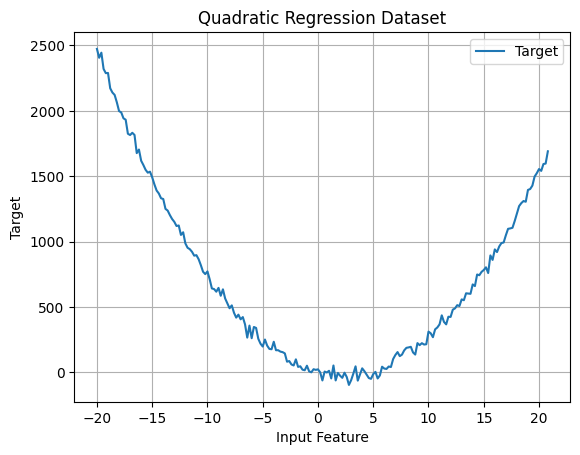

In [4]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Quadratic Regression Dataset')
plt.show()

In [5]:
train_file = './data/quadratic_train.csv'
validation_file = './data/quadratic_validation.csv'

# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])

In [6]:
df_train.head()

,y,x
0,343.968005,10.8
1,1585.894405,-15.8
2,1497.303317,19.6
3,769.909912,-10.4
4,1173.230755,-13.2


In [7]:
df_validation.head()

,y,x
0,1824.856344,-17.2
1,16.997917,-1.2
2,1832.141730,-16.8
3,1395.206684,19.0
4,145.840543,-3.0


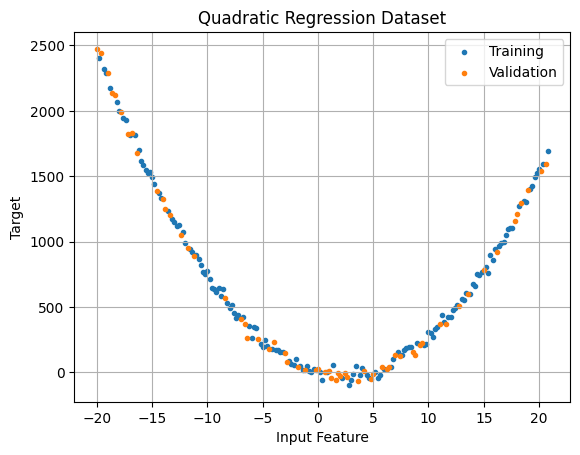

In [8]:
plt.scatter(df_train.x, df_train.y,label='Training',marker='.')
plt.scatter(df_validation.x, df_validation.y,label='Validation',marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Quadratic Regression Dataset')
plt.legend()
plt.show()

In [9]:
# Training data split:
# iloc[:,1:] means all rows (:) and columns from index 1 onwards (1:)
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 

# Training target split:
# iloc[:,0] selects first column
# ravel() converts to 1D array (required by many ML algorithms)
y_train = df_train.iloc[:,0].ravel() # Target: 0th column


# Validation data split:
# Same process as training data but using validation dataset
X_validation = df_validation.iloc[:,1:]

# Validation target split:
# Same process as training target
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# Create an instance of XGBoost Regressor
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor()

In [11]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:453.25811	validation_1-rmse:560.69083
[1]	validation_0-rmse:332.17628	validation_1-rmse:415.62534
[2]	validation_0-rmse:244.45055	validation_1-rmse:312.10338
[3]	validation_0-rmse:180.85819	validation_1-rmse:236.45161
[4]	validation_0-rmse:135.28871	validation_1-rmse:183.16672
[5]	validation_0-rmse:101.61011	validation_1-rmse:142.33860
[6]	validation_0-rmse:77.26878	validation_1-rmse:113.65266
[7]	validation_0-rmse:59.86232	validation_1-rmse:93.77943
[8]	validation_0-rmse:47.35707	validation_1-rmse:80.28422
[9]	validation_0-rmse:38.22185	validation_1-rmse:71.00146
[10]	validation_0-rmse:31.95053	validation_1-rmse:64.92554
[11]	validation_0-rmse:27.07269	validation_1-rmse:61.27254
[12]	validation_0-rmse:23.81246	validation_1-rmse:58.39258
[13]	validation_0-rmse:21.29666	validation_1-rmse:56.78740
[14]	validation_0-rmse:19.66142	validation_1-rmse:55.16771
[15]	validation_0-rmse:18.42793	validation_1-rmse:54.10944
[16]	validation_0-rmse:17.21250	validation_1-rmse:53.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

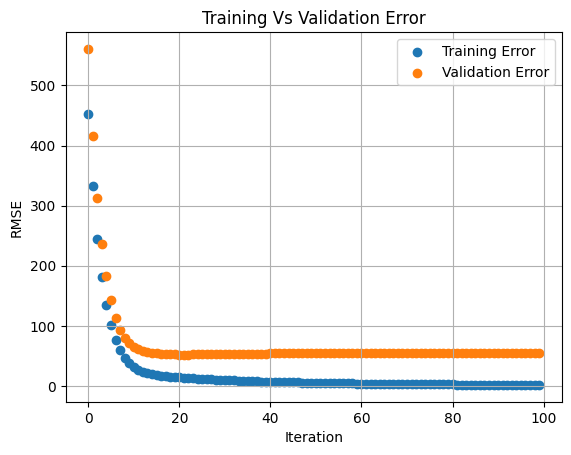

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

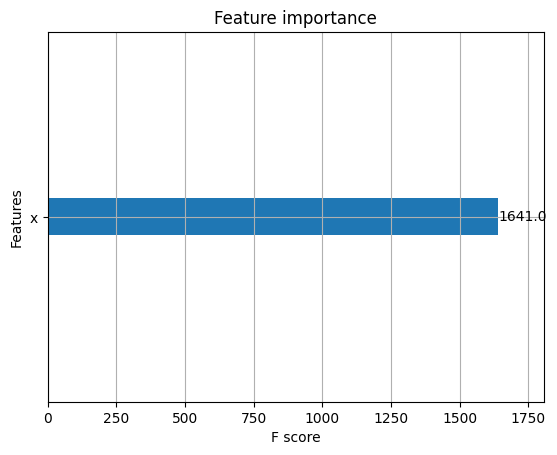

In [16]:
xgb.plot_importance(regressor)
plt.show()

## Validation Dataset Compare Actual and Predicted

In [17]:
result = regressor.predict(X_validation)

In [18]:
result[:5]

array([1931.901   ,   23.967096, 1815.8114  , 1306.171   ,  155.5736  ],
      dtype=float32)

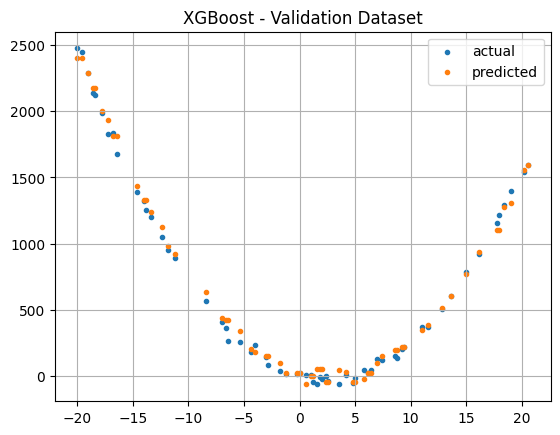

In [19]:
plt.title('XGBoost - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# RMSE Metrics
print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

XGBoost Algorithm Metrics
 Mean Squared Error: 3044.24
 Root Mean Square Error: 55.17


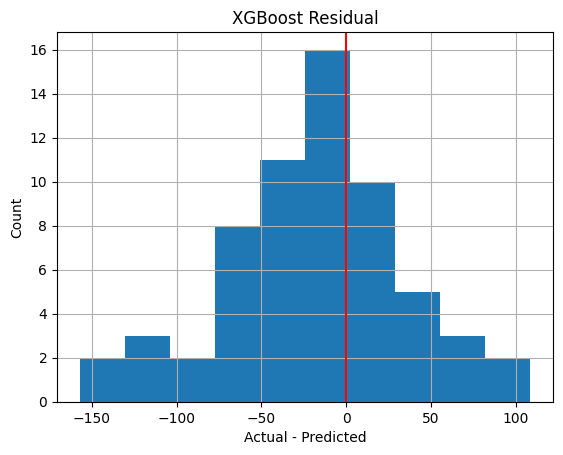

In [21]:
# Residual
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r')
plt.show()

In [22]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 23
 Over  Estimation: 39


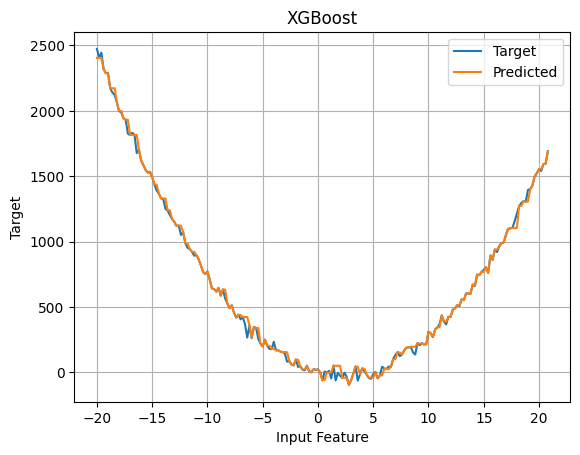

In [23]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

## Linear Regression Algorithm

In [24]:
lin_regressor = LinearRegression()

In [25]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

Compare Weights assigned by Linear Regression.

Original Function: 5*x**2 -23*x + 47 + some noise

Linear Regression Function: -15.08 * x + 709.86 

Linear Regression Coefficients and Intercepts are not close to actual

In [26]:
lin_regressor.coef_

array([-15.07800272])

In [27]:
lin_regressor.intercept_

709.8622001903116

In [28]:
result = lin_regressor.predict(df_validation[['x']])

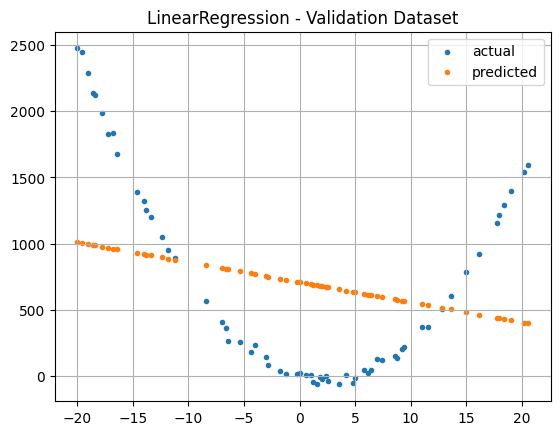

In [29]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean Squared Error: 488269.59
 Root Mean Square Error: 698.76


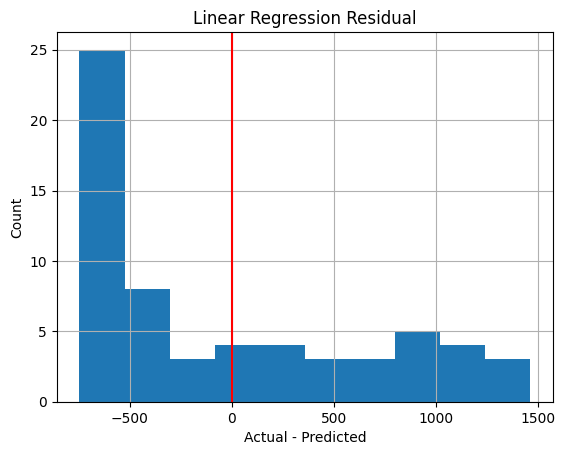

In [31]:
# Residual
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

In [32]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 25
 Over  Estimation: 37


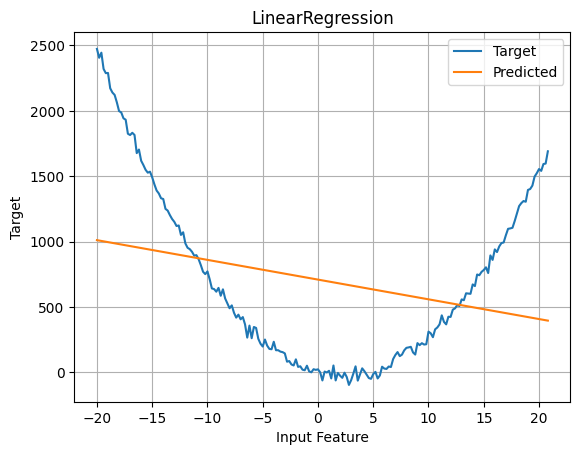

In [33]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,lin_regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

Linear Regression is showing clear symptoms of under-fitting

Input Features are not sufficient to capture complex relationship

<h2>Your Turn</h2>
You can correct this under-fitting issue by adding relavant features.

1. What feature will you add and why?
2. Complete the code and Test
3. What performance do you see now?

In [34]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])
df = pd.read_csv('./data/quadratic_all.csv')

# Add new features 

In [45]:
# Add your new features
# Add quadratic term (x²) to both training and validation sets
df_train['x2'] = df_train['x']**2
df_validation['x2'] = df_validation['x']**2

df['x2'] = df['x']**2


In [46]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [47]:
lin_regressor.fit(X_train,y_train)

LinearRegression()

Original Function: -23*x + 5*x**2 + 47 + some noise (rewritten with x term first)

In [48]:
lin_regressor.coef_

array([-22.98286274,   4.98161803])

In [49]:
lin_regressor.intercept_

5.868107552517017

In [50]:
result = lin_regressor.predict(X_validation)

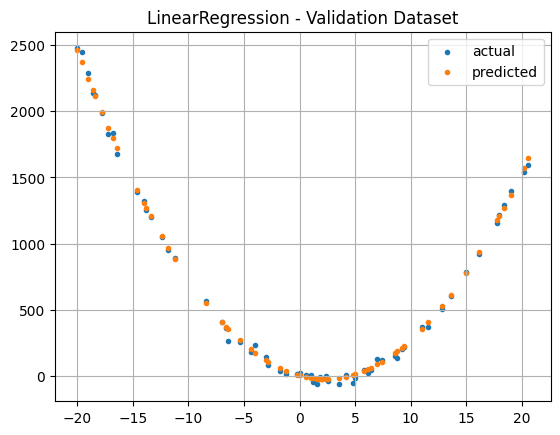

In [51]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

print("***You should see an RMSE score of 30.45 or less")

Linear Regression Metrics
 Mean Squared Error: 927.22
 Root Mean Square Error: 30.45
***You should see an RMSE score of 30.45 or less


In [53]:
df.head()

,x,y,x2
0,-20.0,2473.236825,400.00
1,-19.8,2405.673895,392.04
2,-19.6,2444.523136,384.16
3,-19.4,2320.437236,376.36
4,-19.2,2288.088295,368.64


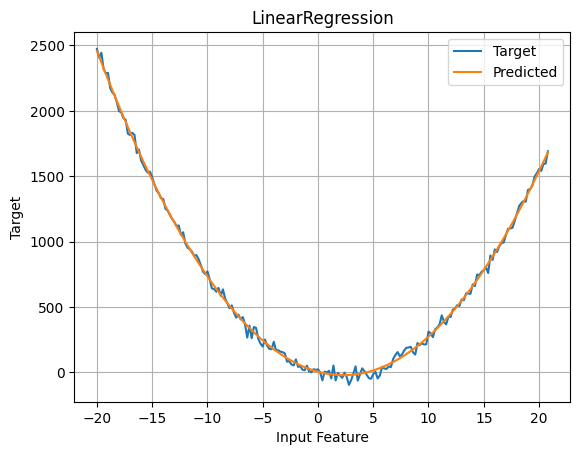

In [54]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,lin_regressor.predict(df[['x','x2']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

### Tree Based Algorithms have a lower bound and upper bound for predicted values

In [55]:
# True Function
def quad_func (x):
    return 5*x**2 -23*x + 47

In [56]:
# X is outside range of training samples
# New Feature: Adding X^2 term

X = np.array([-100,-25,25,1000,5000])
y = quad_func(X)
df_tmp = pd.DataFrame({'x':X,'y':y,'x2':X**2})
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])
df_tmp['linear']=lin_regressor.predict(df_tmp[['x','x2']])

In [57]:
df_tmp

,x,y,x2,xgboost,linear
0,-100,52347,10000,2405.004395,5.212033e+04
1,-25,3747,625,2405.004395,3.693951e+03
2,25,2597,625,1689.919678,2.544808e+03
3,1000,4977047,1000000,1689.919678,4.958641e+06
4,5000,124885047,25000000,1689.919678,1.244255e+08


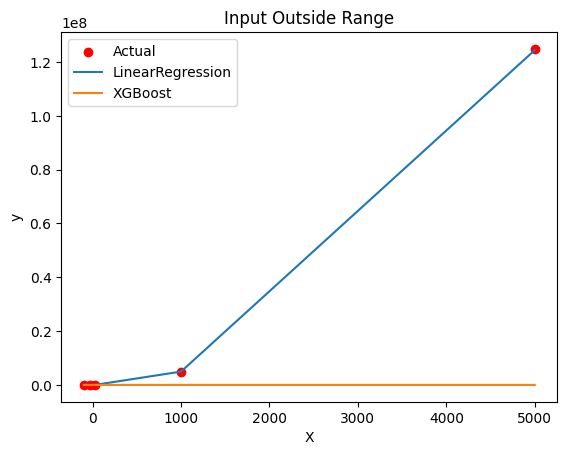

In [58]:
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input Outside Range')
plt.show()

In [59]:
# X is inside range of training samples
X = np.array([-15,-12,-5,0,1,3,5,7,9,11,15,18])
y = quad_func(X)
df_tmp = pd.DataFrame({'x':X,'y':y,'x2':X**2})
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])
df_tmp['linear']=lin_regressor.predict(df_tmp[['x','x2']])

In [60]:
df_tmp

,x,y,x2,xgboost,linear
0,-15,1517,225,1492.838623,1471.475106
1,-12,1043,144,985.423035,999.015457
2,-5,287,25,201.286484,245.322872
3,0,47,0,22.254921,5.868108
4,1,29,1,-0.432127,-12.133137
5,3,23,9,-58.521095,-18.245918
6,5,57,25,-39.980625,15.494245
7,7,131,49,102.305519,89.087352
8,9,245,81,220.961136,202.533404
9,11,399,121,345.741241,355.832399


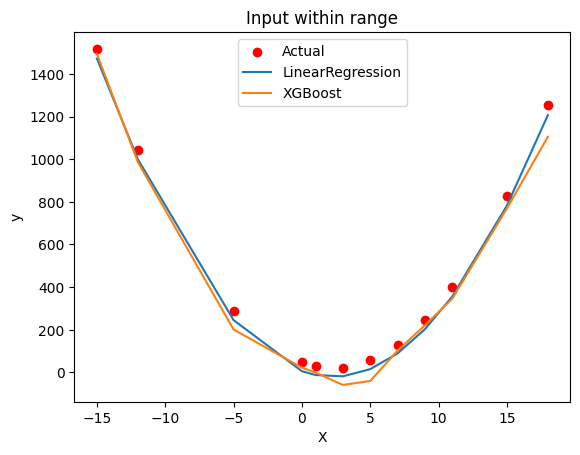

In [61]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input within range')
plt.show()

<h2>Summary</h2>

1. In this exercise, we compared performance of XGBoost model and Linear Regression on a quadratic dataset
2. The relationship between input feature and target was non-linear.
3. XGBoost handled it pretty well; whereas, linear regression was under-fitting
4. To correct the issue, we had to add additional features for linear regression
5. With this change, linear regression performed much better

XGBoost can detect patterns involving non-linear relationship; whereas, algorithms like linear regression may need complex feature engineering